In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
  # Code below
    with open(filename) as training_file:

        read_list = csv.reader(training_file, delimiter=',') # Read file, note commas seperating values
        labels = []
        images = []
        
        next(read_list, None)
        
        for rows in read_list:
            labels_data = rows[0] # Get label data
            images_data = rows[1:] # Get image pixel data
            
            images_matrix = np.array_split(images_data, 28) # Put pixels into 28x28 matrix
            
            images.append(images_matrix)
            labels.append(labels_data)
           
        labels = np.array(labels).astype(float) # Convert string to floats
        images = np.array(images).astype(float)       
        
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

# Your code here
training_images = np.expand_dims(training_images, axis=4)
testing_images = np.expand_dims(testing_images, axis=4)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, # normalize
    rotation_range=40, # rotate randomly up to 40 degrees
    width_shift_range=0.2, # Shift image 20% around screen
    height_shift_range=0.2,
    shear_range=0.2, # Skew x axis up to 20 degrees
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest') # Fills in skewed images based on nearby pixels
    # Your Code Here
    

validation_datagen = ImageDataGenerator(
    rescale=1./255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


In [7]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D

# Your Code Here
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)), # first convolution
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), # second convolution
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2), # Add dropout
    tf.keras.layers.Dense(512, activation='relu'), # 512 neurons
    tf.keras.layers.Dense(25, activation='softmax') # Multiclass set up   
])

# Compile Model. 
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(
    train_datagen.flow(training_images, # Don't need target size/ class mode if done this way
                       training_labels,
                       batch_size=10),
    epochs = 2,
    steps_per_epoch = len(training_images) / 10, # Train length divided by batch size  
    validation_data = validation_datagen.flow(testing_images, # Don't forget to add validation_data
                       testing_labels) # Don't put batch size here either
    )

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/2
2746/2745 [==============================] - 154s 56ms/step - loss: 2.4307 - accuracy: 0.2394 - val_loss: 1.2254 - val_accuracy: 0.5685
Epoch 2/2
2746/2745 [==============================] - 151s 55ms/step - loss: 1.5011 - accuracy: 0.5047 - val_loss: 0.7875 - val_accuracy: 0.7281


[139.1111730266003, 0.5737591]

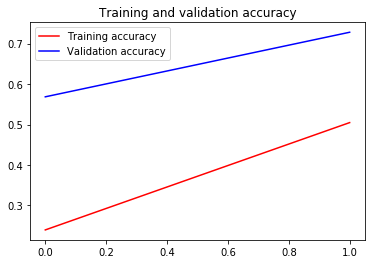

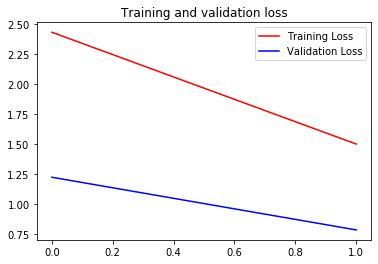

In [9]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy'] # You can pull these parameters out of model.fit_generator
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
# Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [10]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);